In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.naive_bayes import GaussianNB

accuracy : 80.83%

 classification report 
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      1.00      1.00         2
           2       0.33      0.67      0.44         3
           3       1.00      0.00      0.00         5
           4       1.00      0.50      0.67         4
           5       1.00      1.00      1.00         2
           7       1.00      0.75      0.86         4
           8       1.00      0.67      0.80         3
           9       1.00      0.75      0.86         4
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         1
          12       0.40      1.00      0.57         4
          13       1.00      0.80      0.89         5
          14       1.00      0.40      0.57         5
          15       0.67      1.00      0.80         2
          16       1.00      0.67      0.80         3
          17       1.00      1.00     

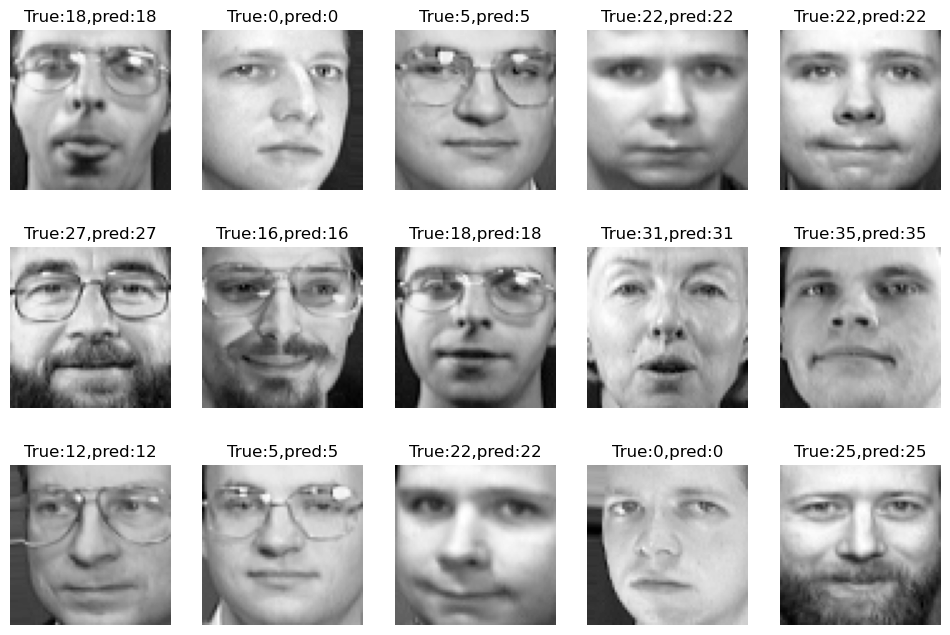

In [7]:
data = fetch_olivetti_faces(shuffle = True,random_state = 42)
x = data.data 
y = data.target 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_pred = gnb.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)
print(f'accuracy : {accuracy*100:.2f}%')

print('\n classification report ')
print(classification_report(y_test,y_pred,zero_division=1))

print('confusion matrix \n',confusion_matrix(y_test,y_pred))

cross_val_accuracy = cross_val_score(gnb,x,y,cv=5,scoring="accuracy")
print(f'\n cross validation accuracy : {cross_val_accuracy.mean()*100:.2f}%')

fig,axes = plt.subplots(3,5,figsize=(12,8))
for ax,image,label,prediction in zip(axes.ravel(),x_test,y_test,y_pred):
    ax.imshow(image.reshape(64,64),cmap='gray')
    ax.set_title(f'True:{label},pred:{prediction}')
    ax.axis('off')

plt.show()
